Intercept (b0): [4.14291332]
Coefficient (b1): [[2.79932366]]
Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


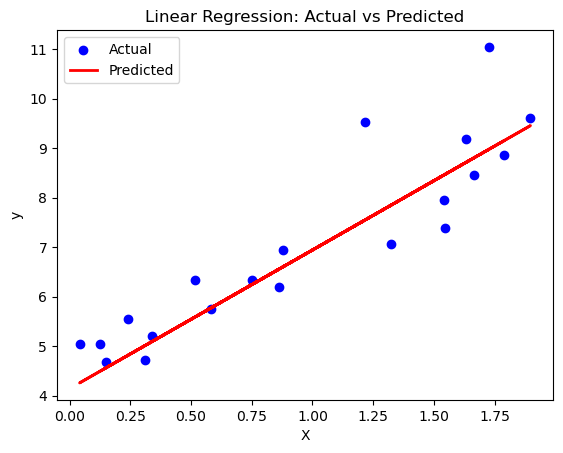

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a sample dataset
# Features (X) and target (y)
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 data points between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [26]:
class LinearReg:
    def __init__(self):
        self.c = None
        self.m = None
    def fit(self, X, y):
        numerator, denominator = 0, 0
        for i in range(X.shape[0]):
            numerator += (X[i] - X.mean()) * (y[i] - y.mean())
            denominator += (X[i] - X.mean()) ** 2
        self.m = numerator/denominator
        self.b = y.mean() - (self.m * X.mean())
        print(self.m)
        print(self.b)
    def predict(self, X):
        return self.m * X + self.b

In [27]:
model2 = LinearReg()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

[2.79932366]
[4.14291332]
0.6536995137170025
0.807205963618139


In [28]:
X_train.shape[0]

80

In [29]:
model.coef_, model.intercept_

(array([[2.79932366]]), array([4.14291332]))

In [32]:
import pandas as pd
df = pd.read_csv('data/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Intercept (b0): -1.02700693745421
Coefficient (b1): [0.57425647]
Mean Squared Error: 7.2941923913826825
R-squared: -18.66185319031249


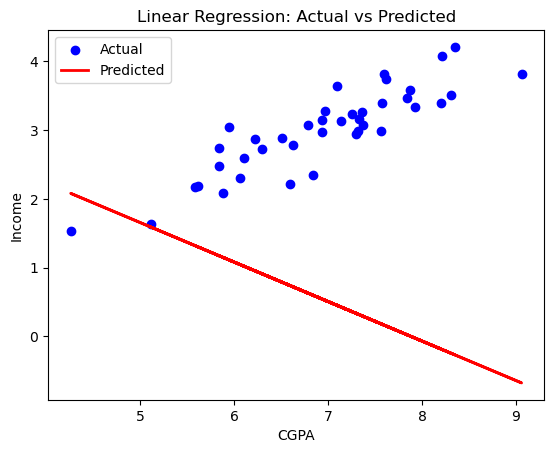

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:1], df.iloc[:,-1], test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred += -3.5
y_pred *= -1

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("CGPA")
plt.ylabel("Income")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [35]:
df.iloc[:,0:1], df.iloc[:,-1]

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)